EDA STUDENT PERFORMANCE

#### Life cycle of Machine learning Project

- Understanding the Problem Statement => This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course. 
- Data Collection  
- Data Checks to Perform  
- Exploratory Data Analysis (EDA)  
- Data Pre-Processing  
- Model Training  
- Choose the Best Model  

In [1]:
### Data Collection

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:

df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [9]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [10]:
## 3. Data Checks to perform
 ## Find missing values
 ## Find Duplicates
 ## Check Data Type
 ## check unique values of each column
 ## Check statistics of data set
 ## Exploring Data
 ## define numerical & categorical columns
 ## Add columns as total score and average score
 ## Find the highest and lowest score counts for math,reading,writing score

In [11]:
## Find missing values
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
# df.isnull().sum()
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Observation: There is no missing values

In [13]:
## Find duplicates
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
df.duplicated().sum()

0

#### Observations:There is no duplicates

In [15]:
## Check Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [16]:
## check unique values each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [17]:
### Check statistics of data set

In [18]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [19]:
## Exploring Data

In [20]:
for col in df.columns:
    print(f"\n{col}:{df[col].unique()}")


gender:['female' 'male']

race/ethnicity:['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch:['standard' 'free/reduced']

test preparation course:['none' 'completed']

math score:[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]

reading score:[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]

writing score:[ 74  88  93  44  75 

In [21]:
# define numerical & categorical columns
numerical_columns = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_columns = [feature for feature in df.columns if df[feature].dtype == 'O']

In [22]:
numerical_columns

['math score', 'reading score', 'writing score']

In [23]:
categorical_columns

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [24]:
print("we have {} numerical features: {}".format(len(numerical_columns), numerical_columns))

we have 3 numerical features: ['math score', 'reading score', 'writing score']


In [25]:
print("we have {} categorical features: {}".format(len(categorical_columns),categorical_columns))

we have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [26]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
## Add columns as total score and average score

In [28]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

In [29]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [30]:
df['average'] = df['total_score']/3

In [31]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [32]:
## Find the highest and lowest score counts for math,reading,writing score

In [33]:
math_full = df[df['math score'] == 100]['average'].count()
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()

In [34]:
print(f'Number of students who score full marks on maths: {math_full}')
print(f'Number of students who score full marks on reading: {reading_full}')
print(f'Number of students who score full marks on writing: {writing_full}')

Number of students who score full marks on maths: 7
Number of students who score full marks on reading: 17
Number of students who score full marks on writing: 14


In [35]:
less_score_math = df[df['math score'] <= 20]['average'].count()
less_score_reading = df[df['reading score'] <= 20]['average'].count()
less_score_writing = df[df['writing score'] <= 20]['average'].count()

In [36]:
print(f'Number of students who score less marks on maths: {less_score_math}')
print(f'Number of students who score less marks on reading: {less_score_reading}')
print(f'Number of students who score less marks on writing: {less_score_writing}')

Number of students who score less marks on maths: 4
Number of students who score less marks on reading: 1
Number of students who score less marks on writing: 3


In [37]:
## Exploring Data ( Visualization )
 ## Visualize average score distribution to make some conclusion.
  ## Histogram
  ## Kernel Distribution Function (KDE)

<Axes: xlabel='average', ylabel='Count'>

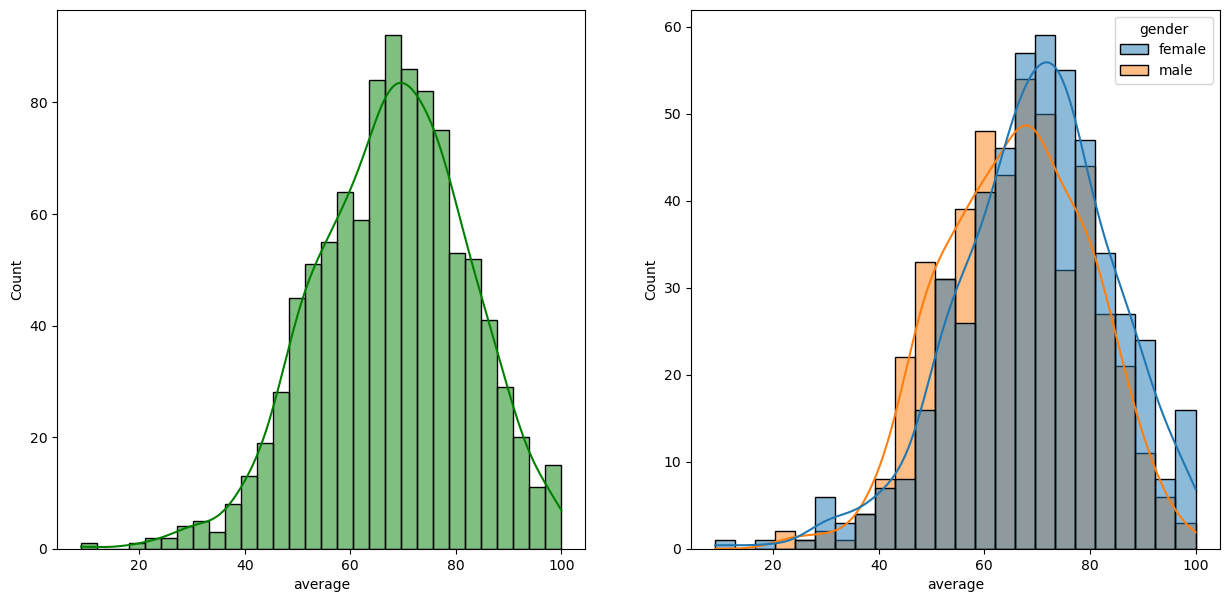

In [38]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')

<Axes: xlabel='total_score', ylabel='Count'>

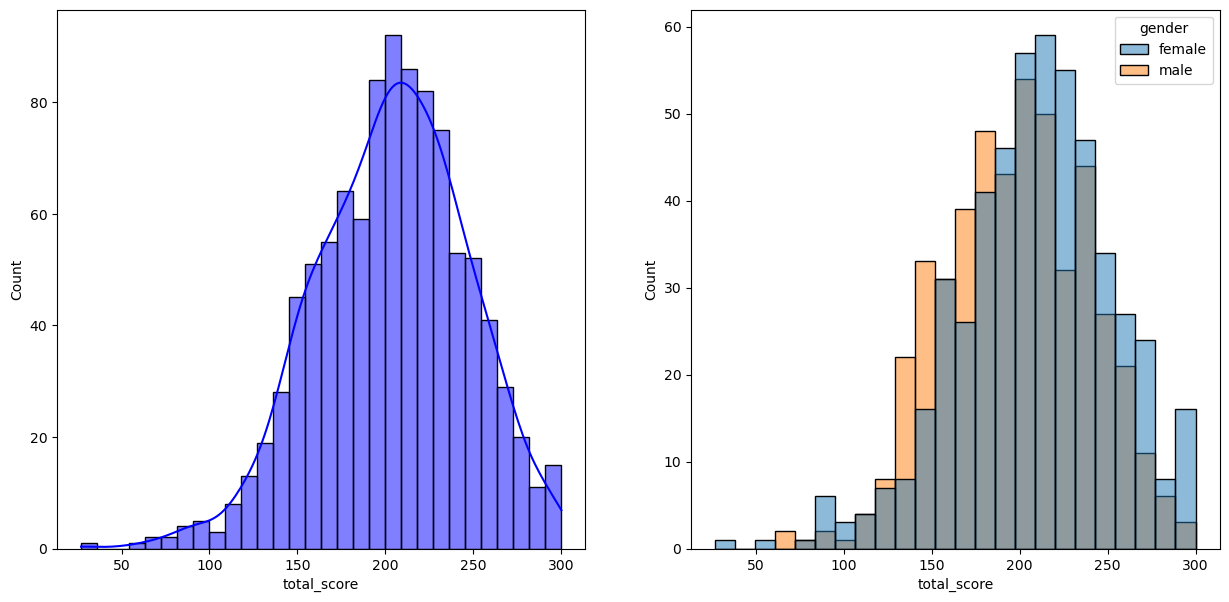

In [39]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x='total_score',kde=True,color='b',bins=30,ax=axs[0])
sns.histplot(data=df,x='total_score',hue='gender',ax=axs[1])

In [40]:
## Insights
 ## female students is performing well based on graph

In [41]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='average', ylabel='Count'>

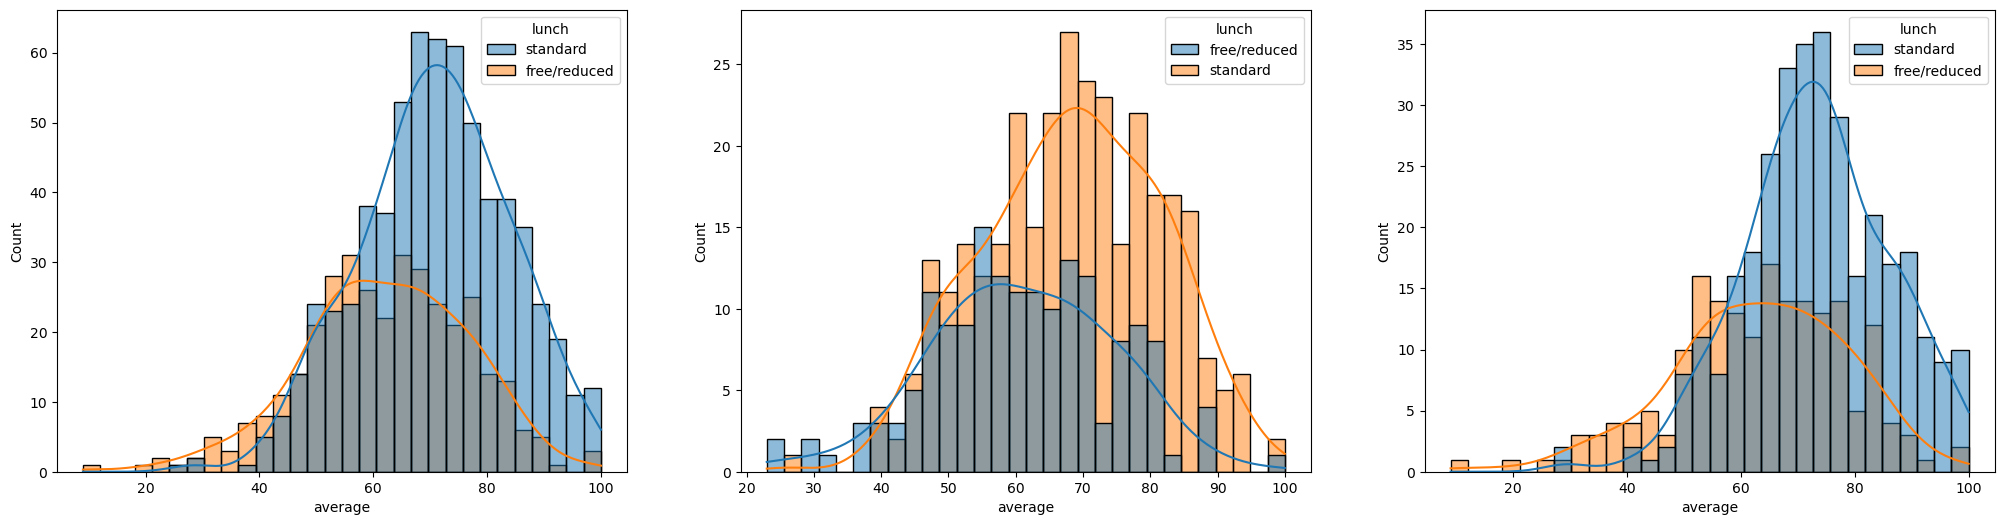

In [42]:
fig,axs = plt.subplots(1,3,figsize=(25,6))
sns.histplot(data=df,x='average',kde=True,bins=30,hue='lunch',ax = axs[0])
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,bins=30,hue='lunch',ax=axs[1])
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,bins=30,hue='lunch',ax=axs[2])

<Axes: xlabel='average', ylabel='Count'>

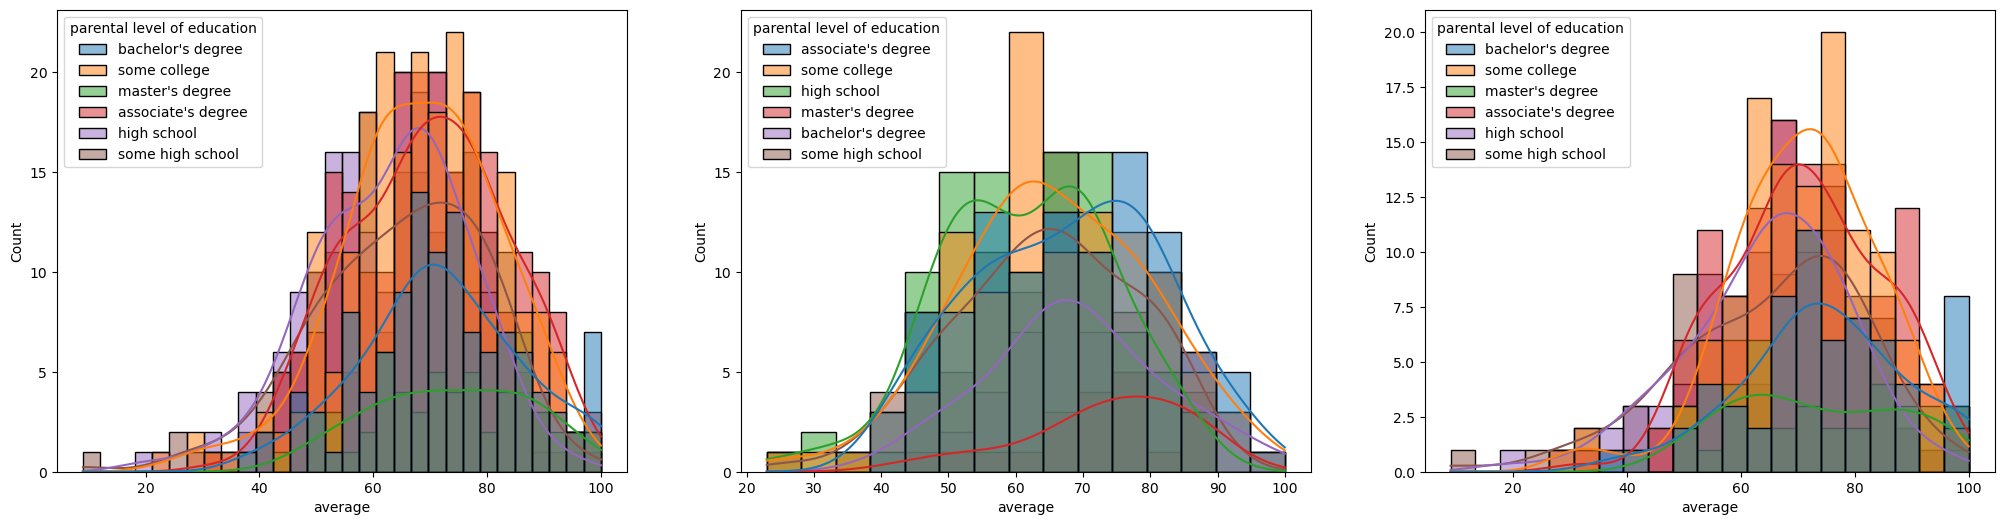

In [43]:
fig,axs = plt.subplots(1,3,figsize=(25,6))
sns.histplot(data=df,x='average',kde=True,bins=30,ax = axs[0],hue='parental level of education')
sns.histplot(data=df[df['gender']=='male'],x='average',hue='parental level of education',kde=True,ax=axs[1])
sns.histplot(data=df[df['gender']=='female'],x='average',hue='parental level of education',kde=True,ax=axs[2])

####  Insights
  1.In general parent's education don't help student perform well in exam.  
  2. 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam  
  3.3rd plot we can see there is no effect of parent's education on female students.

In [44]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: ylabel='writing score'>

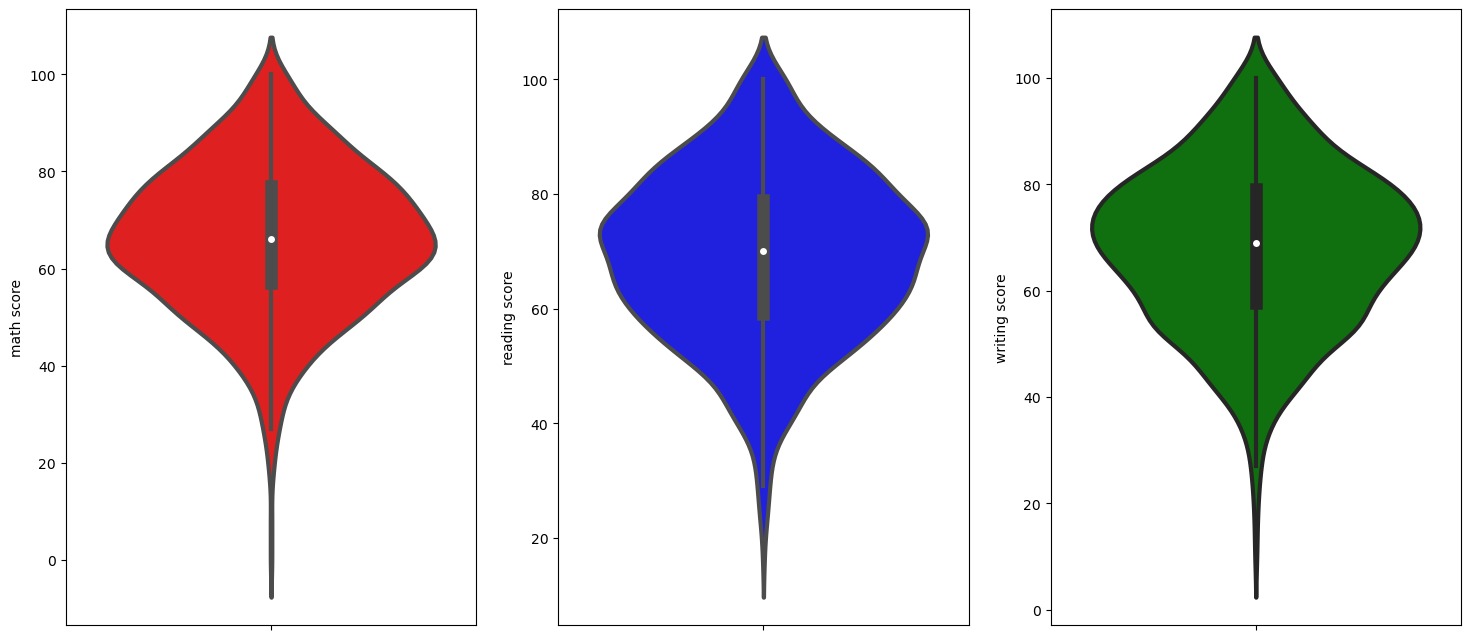

In [45]:
fig,axs = plt.subplots(1,3,figsize=(18,8))
sns.violinplot(y='math score',data=df,color='red',linewidth=3,ax=axs[0])
sns.violinplot(y='reading score',data=df,color='blue',linewidth=3,ax=axs[1])
sns.violinplot(y='writing score',data=df,color='green',linewidth=3,ax=axs[2])

#### Insights
From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80  

In [46]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

Text(0.5, 1.0, 'test preparation course')

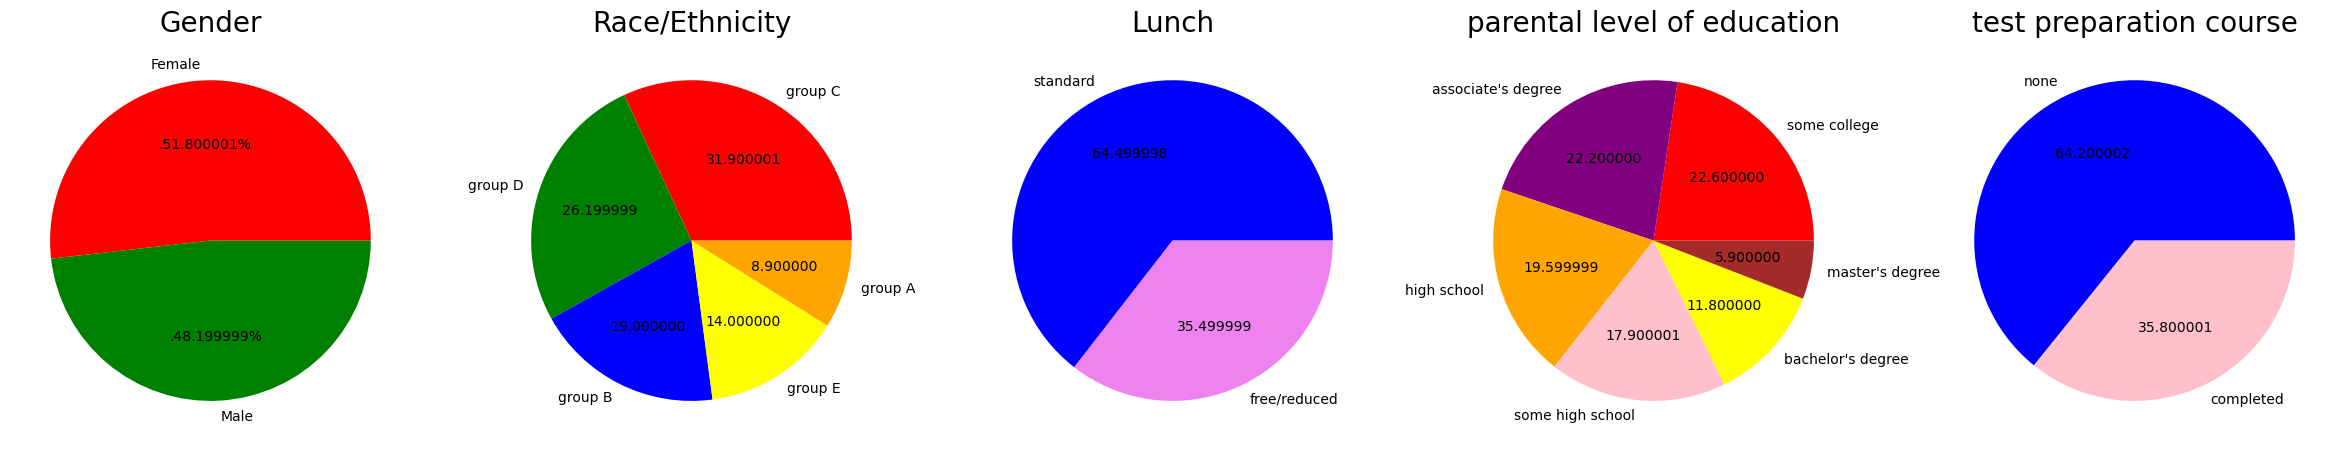

In [47]:
plt.rcParams['figure.figsize'] = (30,12)
size = df['gender'].value_counts()
labels = 'Female','Male'
color='Red','Green'
plt.subplot(1,5,1)
plt.pie(size,labels=labels,colors=color,autopct = '.%2f%%')
plt.title('Gender',fontsize=20)

plt.subplot(1,5,2)
size=df['race/ethnicity'].value_counts()
labels = 'group C','group D','group B','group E','group A'
colors='Red','Green','Blue','Yellow','Orange'
plt.pie(size,labels=labels,colors=colors,autopct='%2f')
plt.title('Race/Ethnicity',fontsize=20)

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels = "standard","free/reduced"
colors = "Blue","Violet"
plt.pie(size,labels=labels,colors=colors,autopct='%2f')
plt.title('Lunch',fontsize=20)

plt.subplot(1,5,4)
size = df['parental level of education'].value_counts()
labels = size.index
colors='Red','Purple','orange','pink','yellow','brown'
plt.pie(size,labels=labels,colors=colors,autopct='%2f')
plt.title('parental level of education',fontsize=20)

plt.subplot(1,5,5)
size = df['test preparation course'].value_counts()
labels = size.index
colors='blue','Pink'
plt.pie(size,labels=labels,colors=colors,autopct='%2f')
plt.title('test preparation course',fontsize=20)



#### Insights
Number of Male and Female students is almost equal  
Number students are greatest in Group C  
Number of students who have standard lunch are greater  
Number of students who have not enrolled in any test preparation course is greater  
Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"  


#### 4.4 Feature Wise Visualization
 ###### 4.4.1 GENDER COLUMN
    How is distribution of Gender ?  
    Is gender has any impact on student's performance ?  
    UNIVARIATE ANALYSIS ( How is distribution of Gender ? )  

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

In [48]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [49]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x1c75fc22090>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'Female'),
  Text(0.06782226650507357, -1.1980818587083752, 'Male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.8%'),
  Text(0.03956298879462625, -0.698881084246552, '48.2%')])

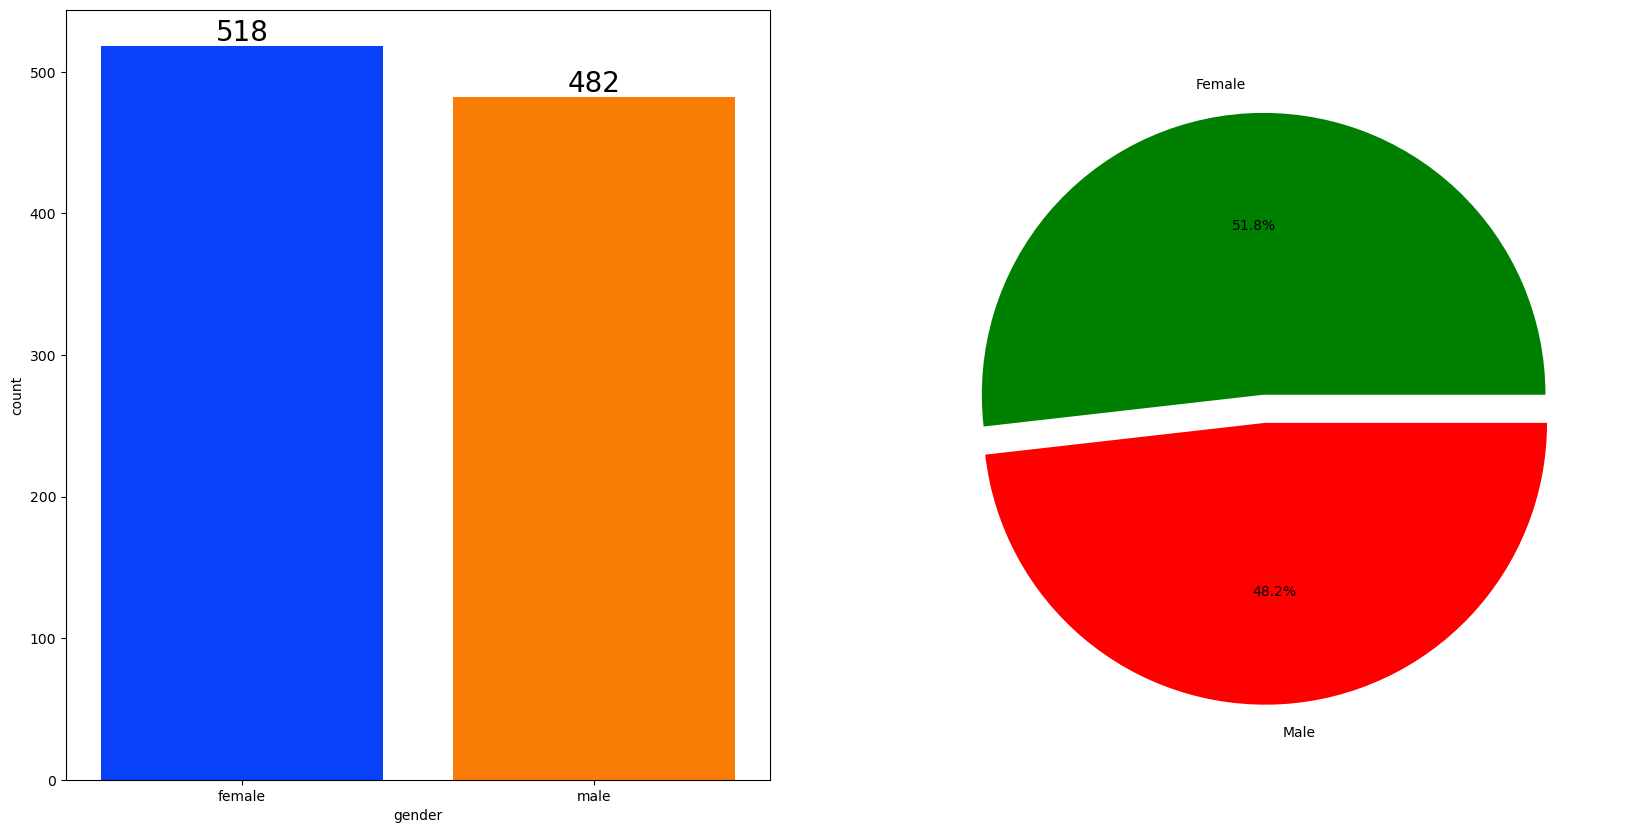

In [50]:
fig,axs = plt.subplots(1,2,figsize=(20,10))
sns.countplot(data=df,x='gender',ax=axs[0],palette='bright',saturation=0.95)
for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=20)
    
    
sizes = df['gender'].value_counts()
labels='Female','Male'
colors='Green','red'
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',explode=[0,0.1])

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [51]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [52]:
gender_group = df.groupby('gender').mean()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25808\481252552.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_group = df.groupby('gender').mean()


In [53]:
gender_group

,math score,reading score,writing score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [54]:
X = ['Total Average','Math Score']
female_score = [gender_group['average'][0],gender_group['math score'][0]]
male_score = [gender_group['average'][1],gender_group['math score'][1]]

In [55]:
X_axis = np.arange(len(X))

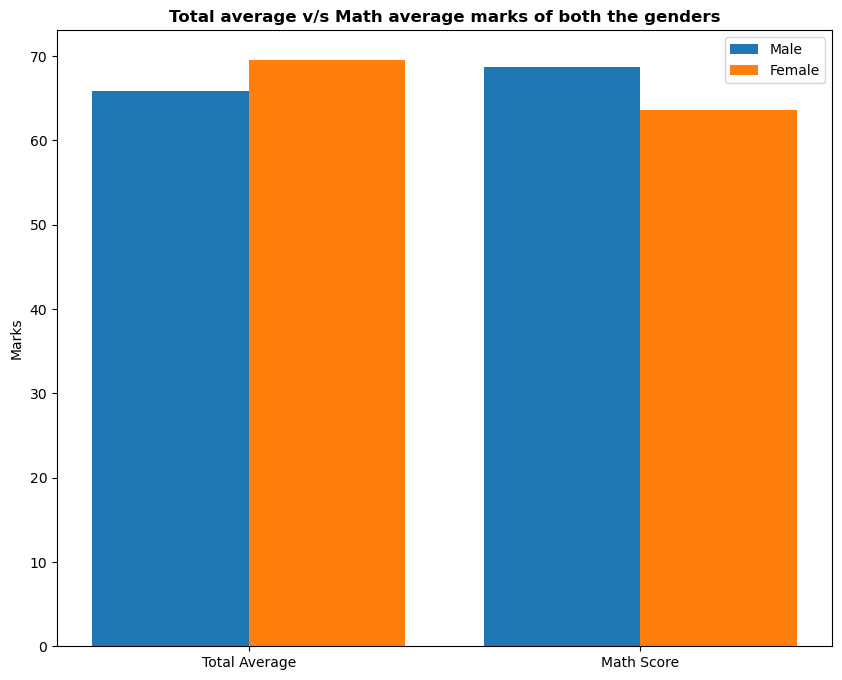

In [89]:
plt.figure(figsize=(10,8))
plt.bar(X_axis - 0.2, male_score, 0.4,label = 'Male')
plt.bar(X_axis + 0.2, female_score, 0.4,label = 'Female')
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()

#### Insights
On an average females have a better overall score than men.  
whereas males have scored higher in Maths.  

#### 4.4.2 RACE/EHNICITY COLUMN
How is Group wise distribution ?  
Is Race/Ehnicity has any impact on student's performance ?

In [ ]:
#### How is Group wise distribution ?

In [ ]:
df.head()

In [ ]:
df['race/ethnicity'].value_counts()

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,8))
sns.countplot(data=df,x='race/ethnicity',ax=ax[0],palette='bright',saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,size=10,color='black')
labels = 'group C','group D','group B','group E','group A'
colors =  'pink','green','red','blue','orange'
plt.pie(df['race/ethnicity'].value_counts(),labels=labels,colors=colors,autopct='%1.2f%%',explode=[0.1,0,0,0,0])

#### Insights
Most of the student belonging from group C /group D.  
Lowest number of students belong to groupA.

In [ ]:
race_group = df.groupby('race/ethnicity')

In [ ]:
race_group

In [ ]:
race_group['writing score'].mean()

In [ ]:
f,ax = plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=race_group['math score'].mean().index,y=race_group['math score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math Score',size=20,color='#005ce6')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=13)

sns.barplot(x=race_group['reading score'].mean().index,y=race_group['reading score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('Reading Score',size=20,color='#005ce6')
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=13)

sns.barplot(x=race_group['writing score'].mean().index,y=race_group['writing score'].mean().values,palette='coolwarm',ax=ax[2])
ax[2].set_title('Writing Score',size=20,color='#005ce6')
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=13)

#### Insights
Group E students have scored the highest marks.  
Group A students have scored the lowest marks.  

#### PARENTAL LEVEL OF EDUCATION COLUMN
What is educational background of student's parent ?  
Is parental education has any impact on student's performance ?

In [ ]:
df.head()

In [ ]:
df['parental level of education'].value_counts()

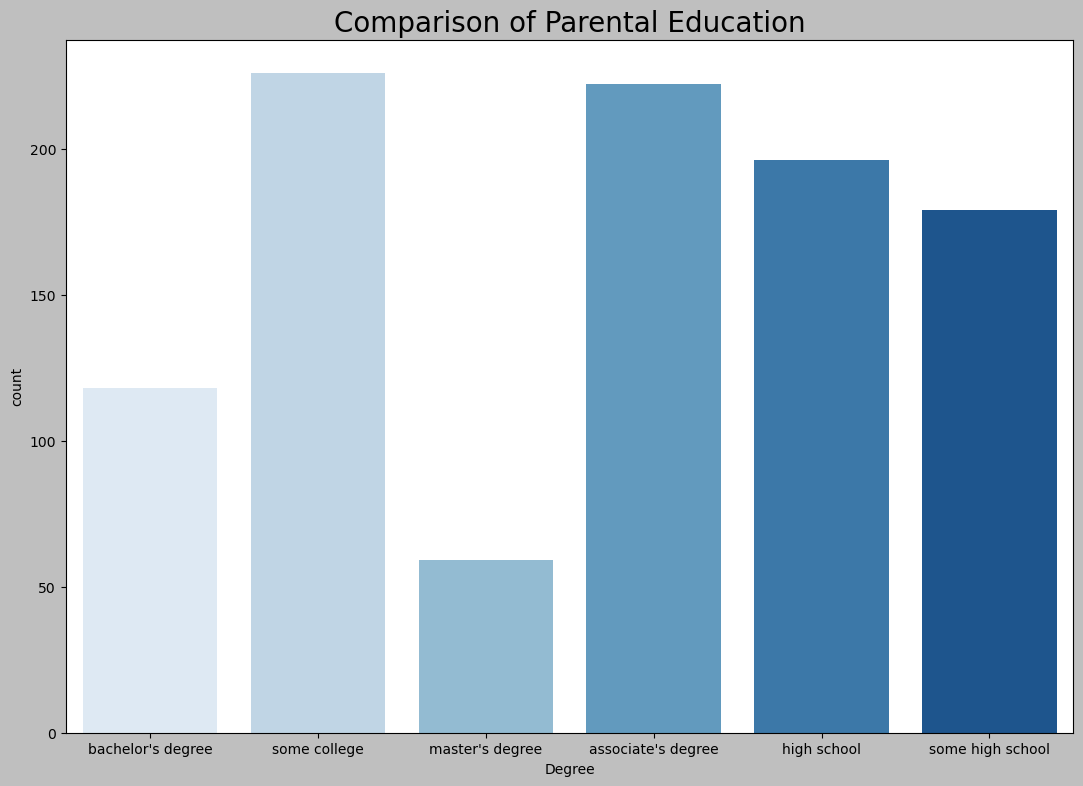

In [92]:
plt.rcParams['figure.figsize'] = (13, 9)
plt.style.use('grayscale')
sns.countplot(x=df['parental level of education'],data=df, palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights
Largest number of parents are from some college.  

In [ ]:
#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

In [ ]:
df.head()

In [57]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [58]:
p_education = df.groupby('parental level of education')

In [59]:
p_education

In [60]:
p_education.mean()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25808\294131778.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p_education.mean()


,math score,reading score,writing score,total_score,average
parental level of education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


In [61]:
p_education.mean()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25808\294131778.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p_education.mean()


,math score,reading score,writing score,total_score,average
parental level of education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


In [62]:
df.groupby('parental level of education').agg('mean')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25808\3389817871.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('parental level of education').agg('mean')


,math score,reading score,writing score,total_score,average
parental level of education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25808\3514923491.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('parental level of education').mean().plot(kind='barh',figsize=(10,10))


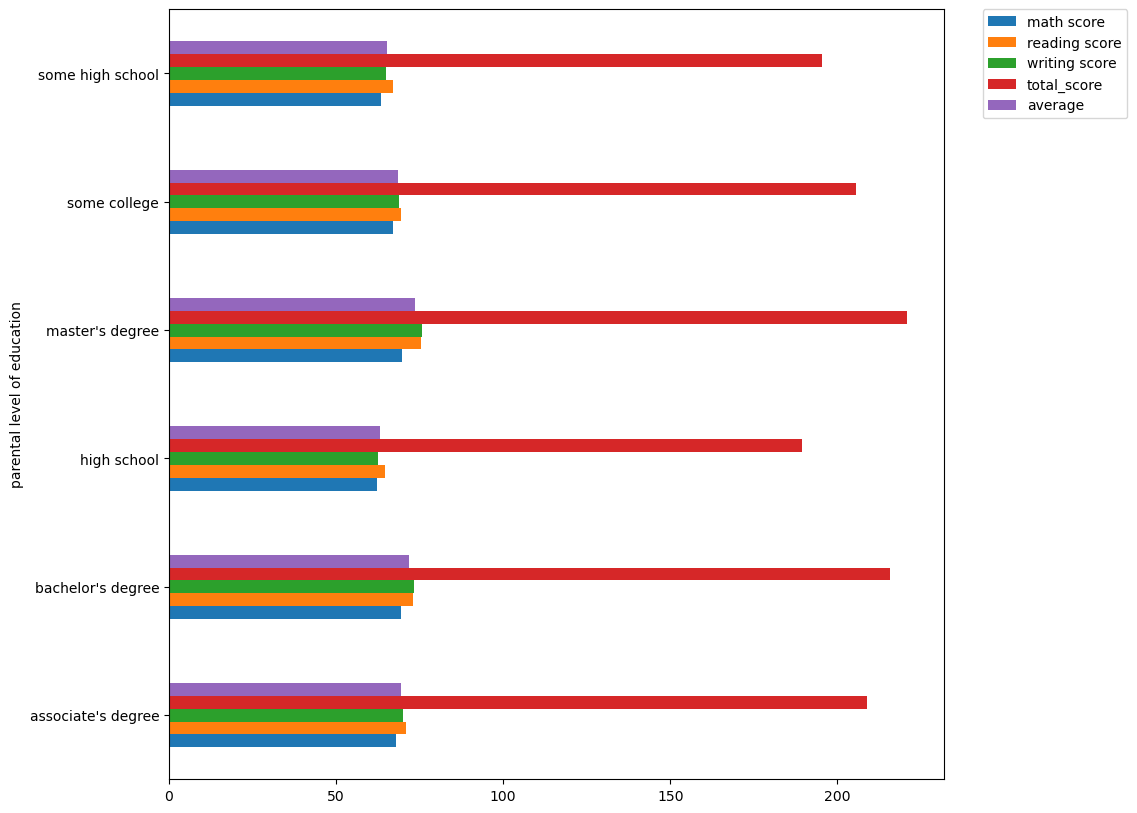

In [63]:
df.groupby('parental level of education').mean().plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights
The score of student whose parents possess master and bachelor level education are higher than others.  

#### LUNCH COLUMN
Which type of lunch is most common amoung students ?  
What is the effect of lunch type on test results?

In [64]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [65]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

Text(0, 0.5, 'Count')

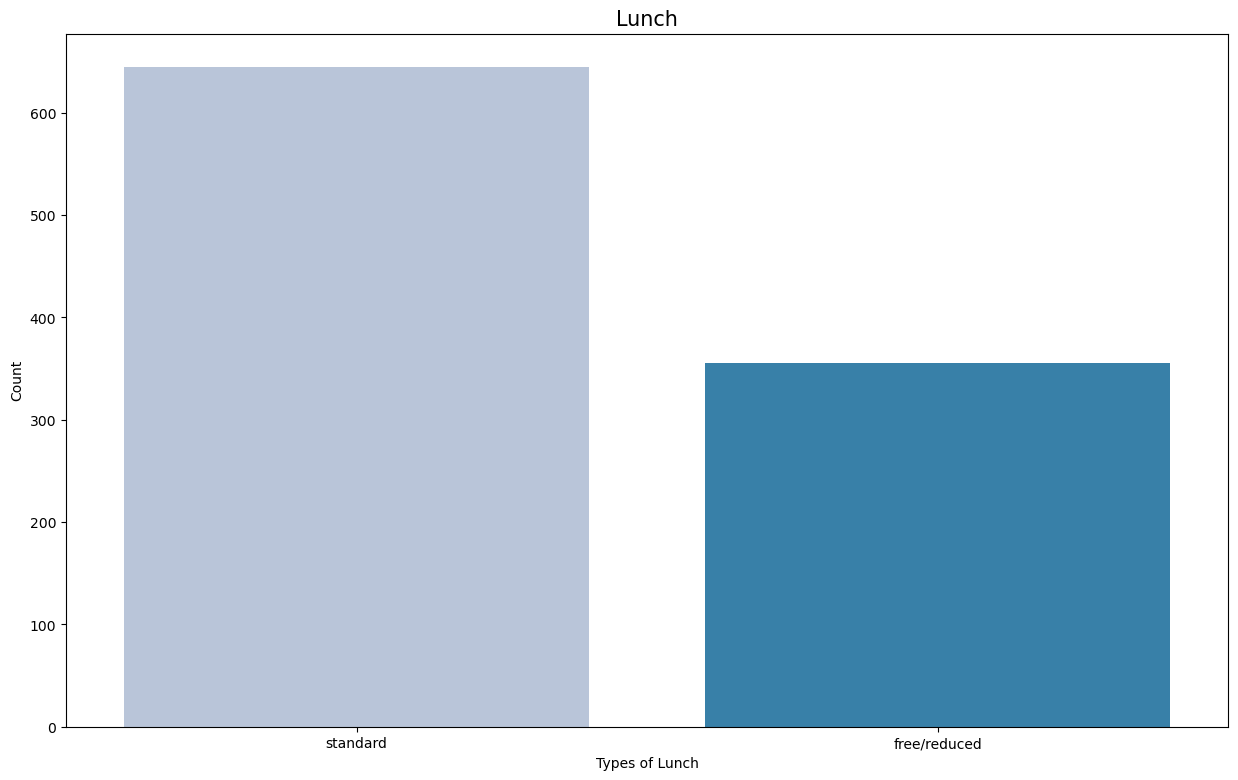

In [66]:
plt.rcParams['figure.figsize'] = (15, 9)
# plt.style.use('seaborn-talk')
sns.countplot(data=df,x ='lunch',palette = 'PuBu')
plt.title('Lunch',fontsize=15,fontweight=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')

#### Insights
Students being served Standard lunch was more than free lunch  

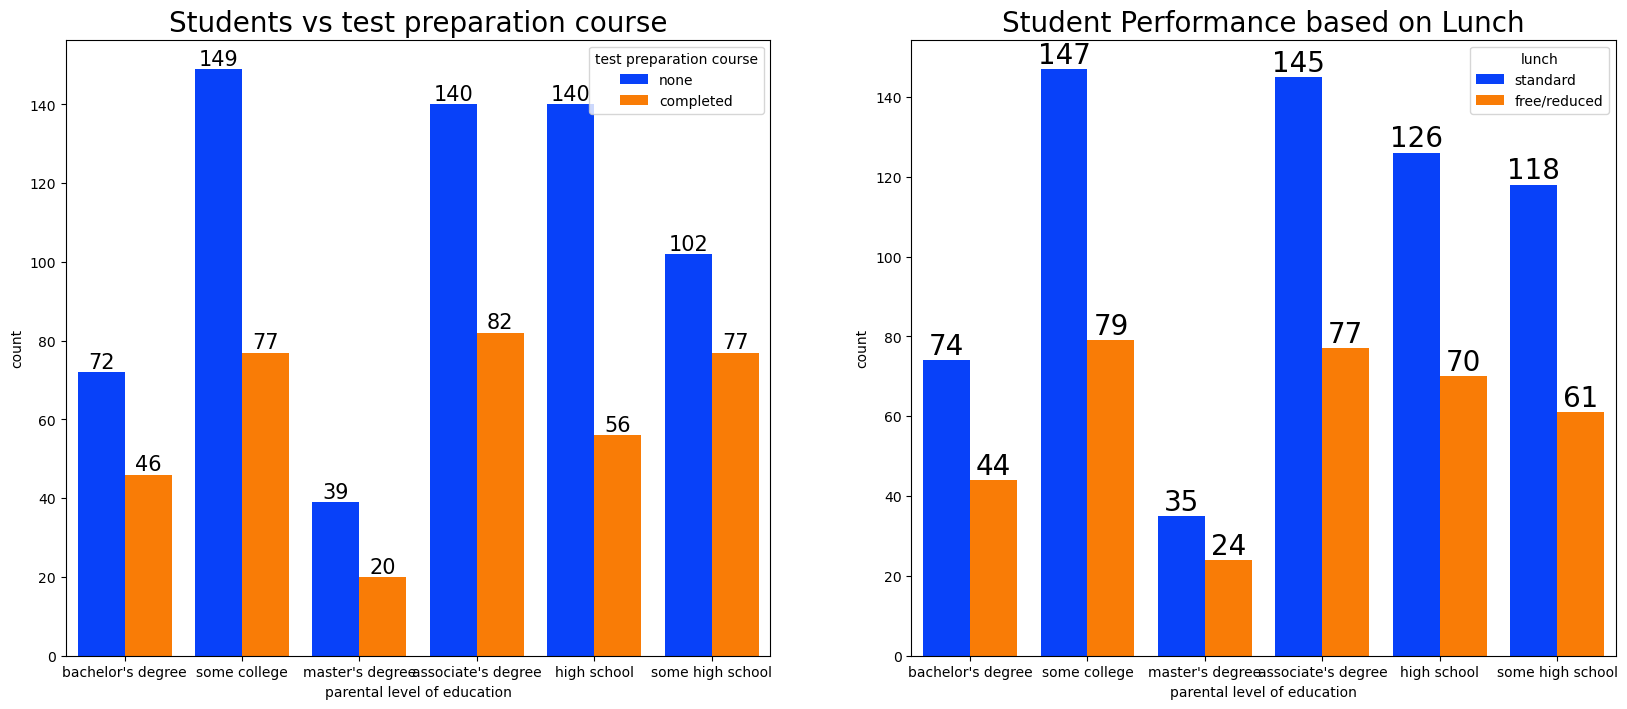

In [67]:
fig,axs = plt.subplots(1,2,figsize=(20,8))
sns.countplot(data=df,x='parental level of education',ax=axs[0],hue='test preparation course',palette='bright',saturation=0.95)
axs[0].set_title('Students vs test preparation course',color='black',size=20)
for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=15)
    
sns.countplot(data=df,x='parental level of education',hue='lunch',palette='bright',ax=axs[1],saturation=0.95)
axs[1].set_title('Student Performance based on Lunch',color='black',size=20)
for container in axs[1].containers:
    axs[1].bar_label(container,color='black',size=20)

#### Insights
Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

In [68]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [69]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

<Axes: xlabel='lunch', ylabel='writing score'>

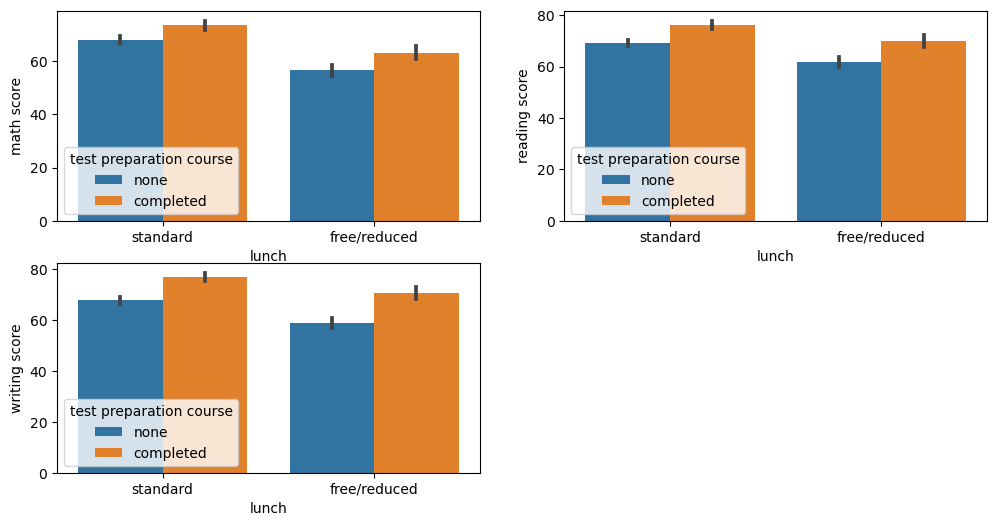

In [70]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

#### Insights
Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### check outliers

<Axes: >

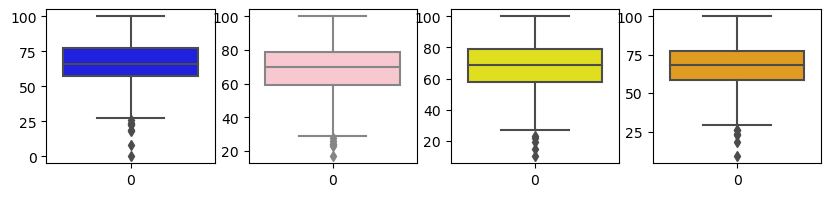

In [83]:
plt.subplots(1,4,figsize=(10,2))
plt.subplot(1,4,1)
sns.boxplot(df['math score'],color='blue')
plt.subplot(1,4,2)
sns.boxplot(df['reading score'],color='pink')
plt.subplot(1,4,3)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(1,4,4)
sns.boxplot(df['average'],color='orange')

#### MUTIVARIATE ANALYSIS USING PAIRPLOT


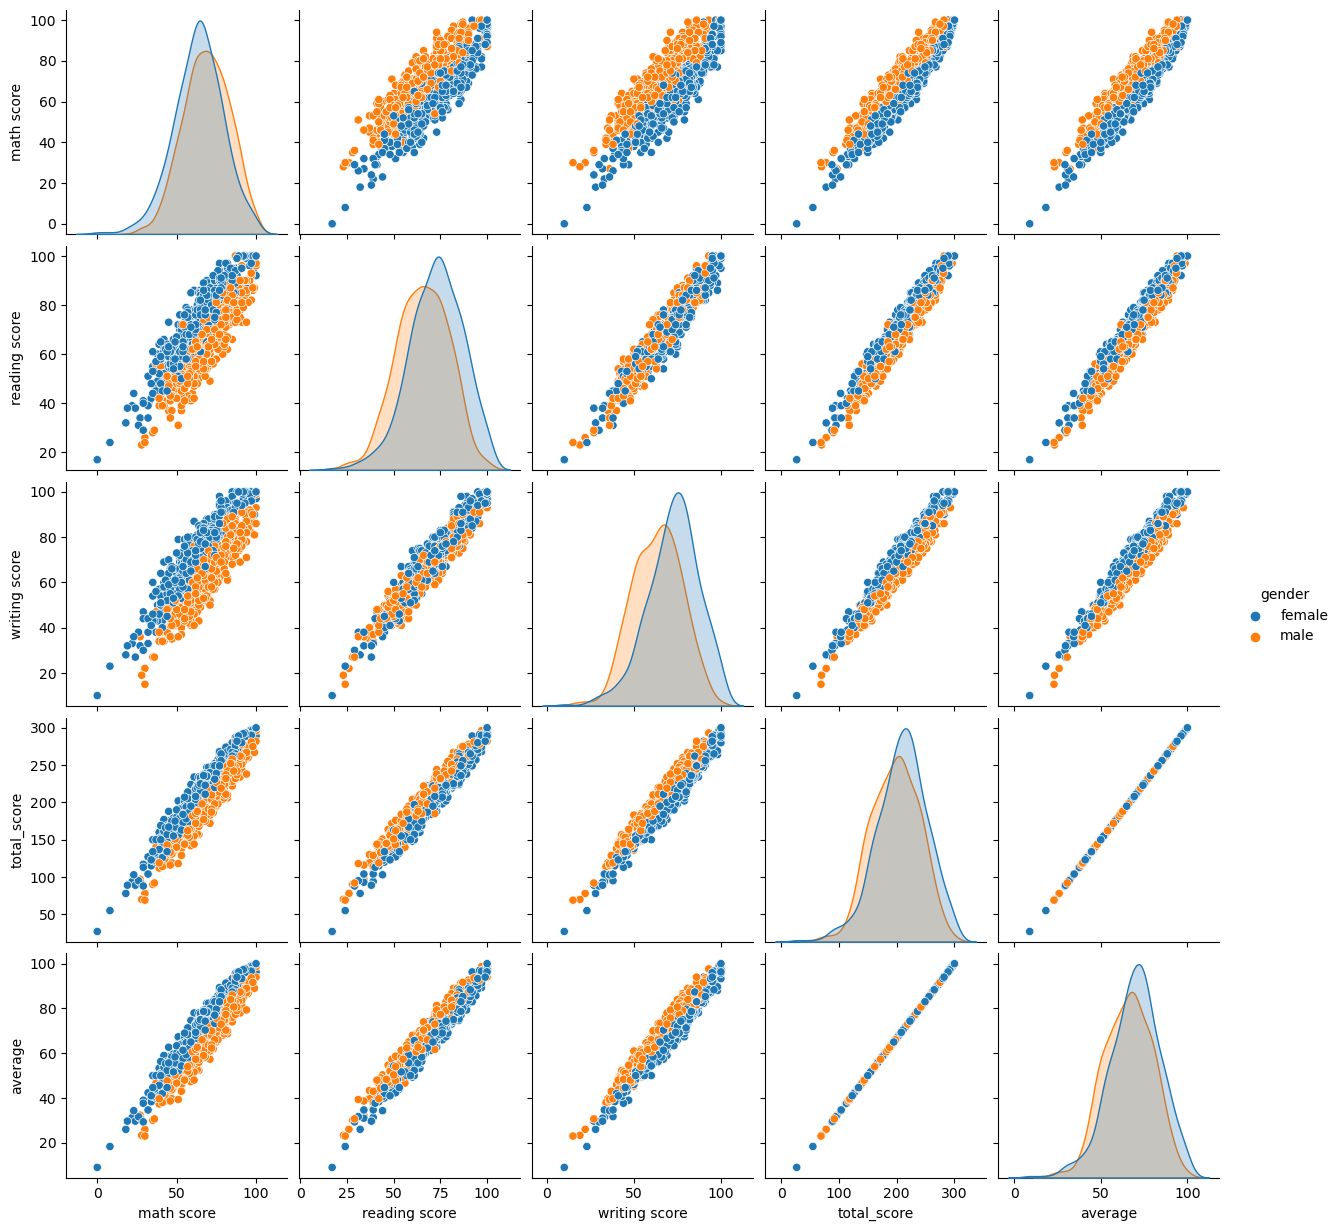

In [88]:
sns.pairplot(data=df,hue='gender')
plt.show()

#### Insights
From the above plot it is clear that all the scores increase linearly with each other.

In [1]:
!pip install catboost

                                              0.0/102.5 MB ? eta -:--:--
                                              0.1/102.5 MB 3.3 MB/s eta 0:00:31
                                              0.5/102.5 MB 6.7 MB/s eta 0:00:16
                                              1.1/102.5 MB 9.5 MB/s eta 0:00:11
                                              1.5/102.5 MB 9.3 MB/s eta 0:00:11
                                             1.9/102.5 MB 10.0 MB/s eta 0:00:11
                                             2.4/102.5 MB 10.0 MB/s eta 0:00:10
     -                                        3.0/102.5 MB 9.9 MB/s eta 0:00:11
     -                                       3.5/102.5 MB 10.2 MB/s eta 0:00:10
     -                                       4.1/102.5 MB 10.4 MB/s eta 0:00:10
     -                                       4.7/102.5 MB 10.6 MB/s eta 0:00:10
     -                                       5.2/102.5 MB 10.7 MB/s eta 0:00:10
     --                                      5.

In [3]:
import catboost
print(catboost.__version__)

1.2.8
